# <center>R2.08 - Outils numériques pour les statistiques descriptives <br>TP6 - Modélisation<center>


_Tom Ferragut, Regis Fleurquin, Lucie Naert_

_IUT de Vannes, BUT Informatique_

### Imports

In [2]:
# importation des packages
import numpy as np
import matplotlib.pyplot as plt
import math

## 0 - Introduction

Ce TP explore les bases de la modélisation statistique, une méthode cruciale pour comprendre et prédire les phénomènes du monde réel à partir de données observées. 

Nous commencerons par introduire le **modèle linéaire**, cela nous permettra d'explorer des techniques pour modéliser des relations plus complexes grâce à la **linéarisation**.  Ensuite, nous aborderons l'évaluation des modèles, en particulier le calcul du **coefficient de détermination**, pour choisir le meilleur modèle et faire des **prévisions** sur de nouvelles données. 

On considère un jeu de données comportant deux variables quantitatives **X** et **Y**, l'objectif de ce TP est d'automatiser le choix du modèle optimal reliant ces deux variables. Pour une nouvelle donnée **x** de la variable **X**, nous serons ainsi capable de prédire au mieux la valeur associée **y** de la variable **Y**.

## 1 - Modélisation
### 1.a - Modèle linéaire

--------------------

Dans cette première partie nous implémentons un modèle linéaire. Pour cela nous commençons par la rédaction de petites fonctions dont nous aurons besoin pour l'application de la **méthode des moindres carrés**.

--------------------

>__Question 1 :__ Implémenter les méthodes suivantes :
> - Une méthode `Moyenne` qui renvoie la moyenne d'une liste de valeurs.
> - Une méthode `Variance` qui renvoie la variance d'une liste de valeurs.
> - Une méthode `Covariance` qui renvoie la covariance de **deux** listes `X` et `Y`.

In [24]:
def Moyenne(X):
    return np.sum(X)/len(X) 


def Variance(X):
    #Calcul de la moyenne de X
    moyenne_X = Moyenne(X)

    #Nouvelle liste contenant (xi-moyenne)²
    Ecarts=[(x-moyenne_X)**2 for x in X]
    return np.sum(Ecarts)/len(Ecarts)


   
def Covariance(X,Y):
    #Calcul des moyennes de X et de Y
    moyenne_X = Moyenne(X)
    moyenne_Y = Moyenne(Y)

    #Nouvelle liste contenant (x_i-moyenne_X) * (y_i-moyenne_Y)
    Ecarts = [(x-moyenne_X)*(y-moyenne_Y) for x,y in zip(X,Y)]
    return np.sum(Ecarts)/len(Ecarts)
    



#############
### Test ###
#############


try:
    assert Moyenne([0,2,4,6,8,10,12,14]) == 7
    print("Moyenne : OK")
except:
    print("Moyenne : ERREUR")
try:
    assert Variance([0,5,10,15,20]) == 50
    print("Variance : OK")
except:
    print("Variance : ERREUR")  
try:
    assert Covariance([2,2,4,6,6],[5,5,10,15,15]) == 8
    print("Covariance : OK")
except:
    print("Covariance : ERREUR")

Moyenne : OK
Variance : OK
Covariance : OK


--------------------

Nous avons toutes les fonctions qu'il nous faut pour déterminer un **modèle linéaire**. On rappelle que ce modèle linéaire est la droite réprésentant au mieux un nuage de points, le nuage de points étant déterminé par les deux variables $X$ et $Y$.

Voici un exemple de jeu de données :

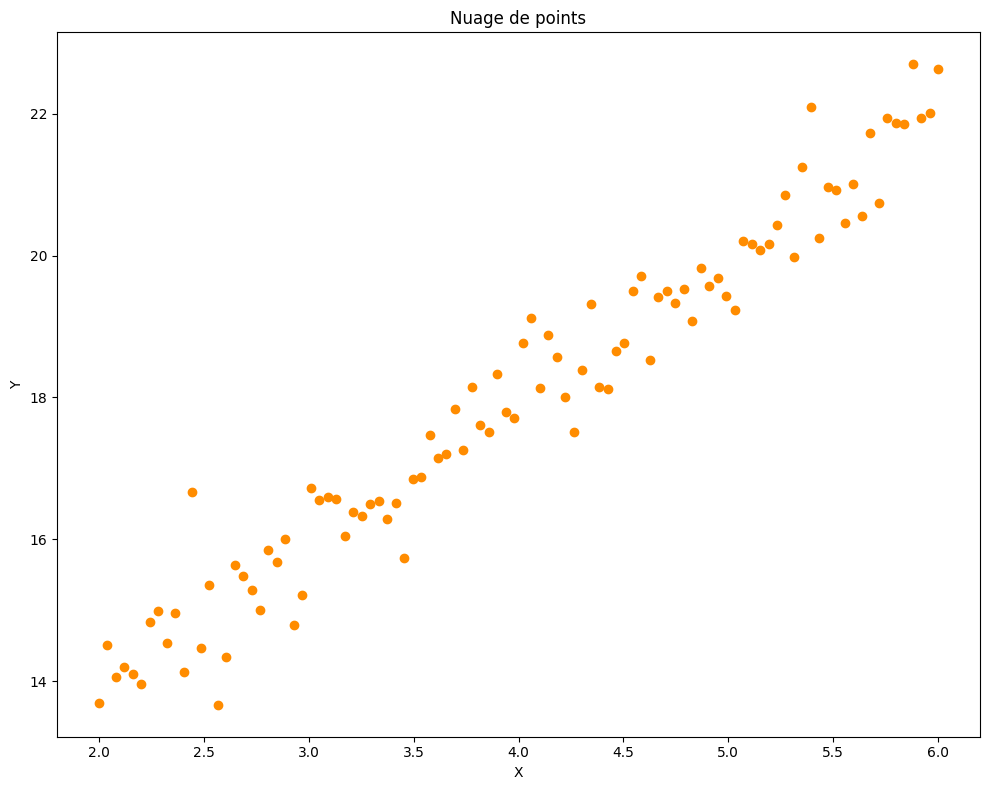

In [25]:
# Génération de valeurs X
X = np.linspace(2, 6, 100)  

# Ajout de bruit
bruit = np.random.normal(loc=0, scale=0.5, size=len(X)) 

# Génération de valeurs Y
Y = 2*X + 10 + bruit

plt.figure(figsize=(10, 8))

plt.scatter(X, Y, color='darkorange', label='Linéaire avec bruit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nuage de points')

plt.tight_layout()
plt.show()


La droite du modèle linéaire que nous cherchons à pour équation $aX+b$, où $a$ et $b$ sont déterminés par la formule de la **méthode des moindres carrées** du **cours**.

--------------------

>__Question 2 :__ Implémenter une méthode `Regression` qui prend en argument deux listes `X` et `Y` de même taille et qui renvoie le couple $(a,b)$ de coefficients obtenus par la méthode des moindres carrés (Cf poly). 
>
>Puis exécuter  la cellule d'après pour afficher votre droite.

In [44]:
def Regression(X,Y):
    a = Covariance(X,Y)/Variance(X)
    b = Moyenne(Y) - a * Moyenne(X)
    return (a,b)
    

#############
### Test ###
#############     

try:
    assert Regression([0,1,2,3,4,5],[1,3,5,7,9,11]) == (2,1)
    print("Regression : OK")
except:
    print("Regression : ERREUR")

Regression : OK


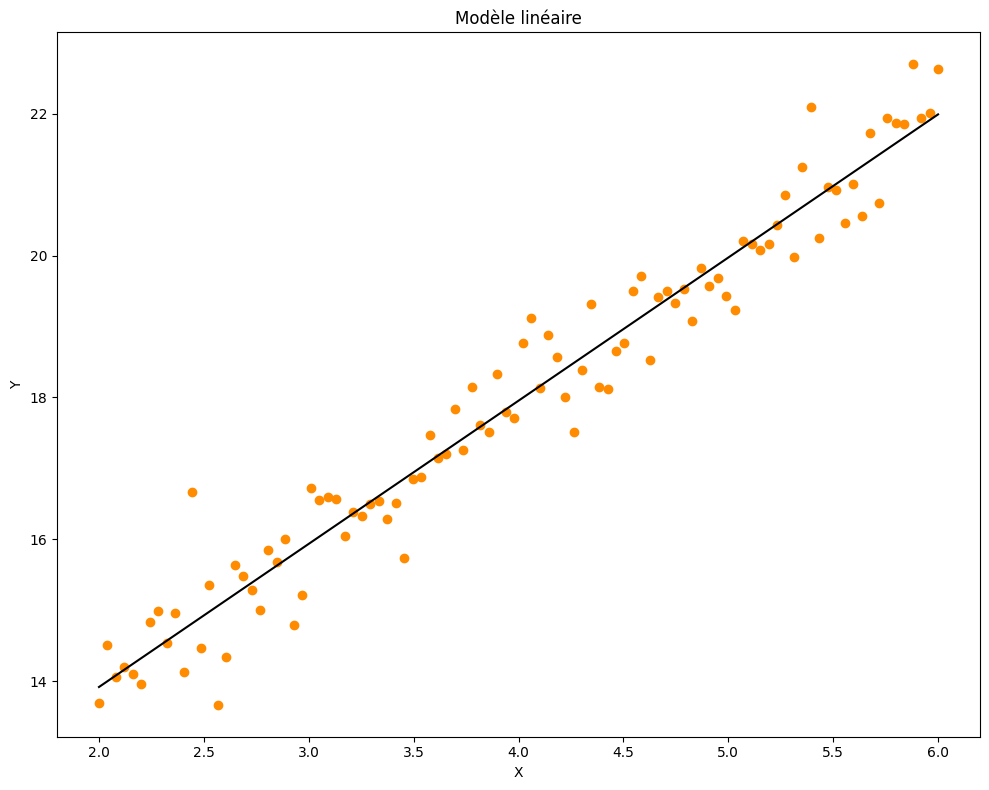

In [45]:
# On détermine les paramètres de la droite
modele_lineaire=Regression(X,Y)

a=modele_lineaire[0]
b=modele_lineaire[1]

#Un créé une liste contenant les valeurs du modèle
Y_modele_lineaire=[a*x+b for x in X]

#Affichage du graph
plt.figure(figsize=(10, 8))

#Affichage du nuage de point
plt.scatter(X, Y, color='darkorange', label='Linéaire avec bruit')
#Affichage du modèle linéaire
plt.plot(X, Y_modele_lineaire, color='black', label='Modèle')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Modèle linéaire')

plt.tight_layout()
plt.show()

### 1.b - Implémentations de modèles non linéaires

--------------------
Le modèle linéaire est très efficace quand le nuage de points des données se rapproche d'une droite, mais ce n'est pas toujours le cas. C'est pourquoi nous avons besoin de modèles supplémentaires :
- Le modèle **Puissance**
- Le modèle **Exponentiel**
- Le modèle **Logistique**

Les formules nécessaires pour implémenter la linéarisation sont disponible dans le tableau correspondant dans le **poly de cours**.

--------------------

>__Question 3 :__ Implémenter une méthode `Linearisation_Puissance` qui prend en argument deux listes `X` et `Y` de même taille et qui renvoie deux listes `X'` et `Y'` correspondants aux variables linéarisées du modèle **Puissance**. 

In [47]:
# Méthode de linéarisation du modèle Puissance #

def Linearisation_Puissance(X,Y):
    X_Prime = [math.log(x) for x in X ]
    Y_Prime = [math.log(y) for y in Y ]	    
    return[X_Prime, Y_Prime]

#############
### Test ###
#############   

try:
    assert Linearisation_Puissance([1,math.exp(2),math.exp(3),math.exp(4),math.exp(5)],[1,math.exp(2),math.exp(3),math.exp(4),math.exp(5)]) == [[0.0, 2.0, 3.0, 4.0, 5.0], [0.0, 2.0, 3.0, 4.0, 5.0]]
    print("Linearisation_Puissance : OK")
except:
    print("Linearisation_Puissance : ERREUR")

Linearisation_Puissance : OK


>__Question 4 :__ De la même façon, implémenter les deux méthodes suivantes :
> - Une méthode `Linearisation_Exponentiel`qui linéarise le modèle Exponentiel
> - Une méthode `Linearisation_Logistique` qui linéarise le modèle Logistique

In [54]:
# Méthode de linéarisation du modèle Exponentiel #

def Linearisation_Exponentiel(X,Y):
    X_Prime = X
    Y_Prime = [math.log(y) for y in Y ]	 
    return[X_Prime, Y_Prime]

# Méthode de linéarisation du modèle Logistique #

def Linearisation_Logistique(X,Y):
    X_Prime = X
    Y_Prime = [math.log(y/(1-y)) for y in Y ]	 
    return[X_Prime, Y_Prime]


#############
### Test ###
#############   

try:
    assert Linearisation_Exponentiel([1,2,3,4,5],[1,math.exp(2),math.exp(3),math.exp(4),math.exp(5)]) == [[1.0, 2.0, 3.0, 4.0, 5.0], [0.0, 2.0, 3.0, 4.0, 5.0]]
    print("Linearisation_Exponentiel : OK")
except:
    print("Linearisation_Exponentiel : ERREUR")
try:
    assert Linearisation_Logistique([1,2,3],[0.5,0.75,0.875]) == [[1, 2, 3], [0, math.log(3), math.log(7)]]
    print("Linearisation_Logistique : OK")
except:
    print("Linearisation_Logistique : ERREUR")

Linearisation_Exponentiel : OK
Linearisation_Logistique : OK


--------------------

Nous allons maintenant écrire une méthode permettant d'optimiser les paramètres de n'importe lequel de ces quatres modèles. Les différentes étapes sont détaillées dans la question 5.

Il peut être **difficile** de tout écrire d'un coup, vous pouvez essayer de répondre à la question suivante d'abord pour **un seul** modèle (le modèle linéaire étant le plus simple), puis de le faire pour tous à la fois ! 

--------------------

>__Question 5 :__ Implémenter un fonction `Modelisation` qui prend en argument deux listes `X` et `Y` ainsi qu'un paramètre `choix_modèle`( $\in$ \['lineaire','puissance','exponentiel','logistique'\] ) et qui renvoie une liste `Y''` correspondant aux valeurs optimales du modèle `choix_modèle`.  
>Les étapes pour obtenir `Y''` sont :
> - Linéariser les variables `X` et `Y` pour obtenir `X'` et `Y'`
> - Réaliser une regression pour obtenir les paramètres optimaux $a$ et $b$ de la droite $Y'=a X' + b$
> - Utiliser $a$ et $b$ pour déterminer les paramètres du modèle choisi $Y''=\ ...X^d$ ou $Y''=e^{...X}$ etc...

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

def Modelisation(X, Y, choix_modele):
    if choix_modele == 'lineaire':
        X_prime = X
        Y_prime = Y
        a, b = np.polyfit(X_prime, Y_prime, 1)  # Régression linéaire
        Y_optimal = a * X_prime + b

    elif choix_modele == 'puissance':
        X_prime = np.log(X)
        Y_prime = np.log(Y)
        a, b = np.polyfit(X_prime, Y_prime, 1)  # Régression linéaire
        Y_optimal = np.exp(a * X_prime + b)

    elif choix_modele == 'exponentiel':
        X_prime = X
        Y_prime = np.log(Y)
        a, b = np.polyfit(X_prime, Y_prime, 1)  # Régression linéaire
        Y_optimal = np.exp(a * X_prime + b)

    elif choix_modele == 'logistique':
        X_prime = X
        Y_prime = np.log(Y / (1 - Y))
        a, b = np.polyfit(X_prime, Y_prime, 1)  # Régression linéaire
        Y_optimal = np.exp(a * X_prime + b) / (1 + np.exp(a * X_prime + b))

    return Y_optimal

--------------------

Une fois la question 5 terminée, vous pouvez exécuter la céllule suivante pour observer si votre méthode fonctionne pour chacun des quatres modèles.

--------------------

C:\Users\omerf\AppData\Local\Temp\ipykernel_8236\4171325661.py:20: RuntimeWarning: invalid value encountered in log
  Y_prime = np.log(Y)
C:\Users\omerf\AppData\Local\Temp\ipykernel_8236\4171325661.py:26: RuntimeWarning: invalid value encountered in log
  Y_prime = np.log(Y / (1 - Y))


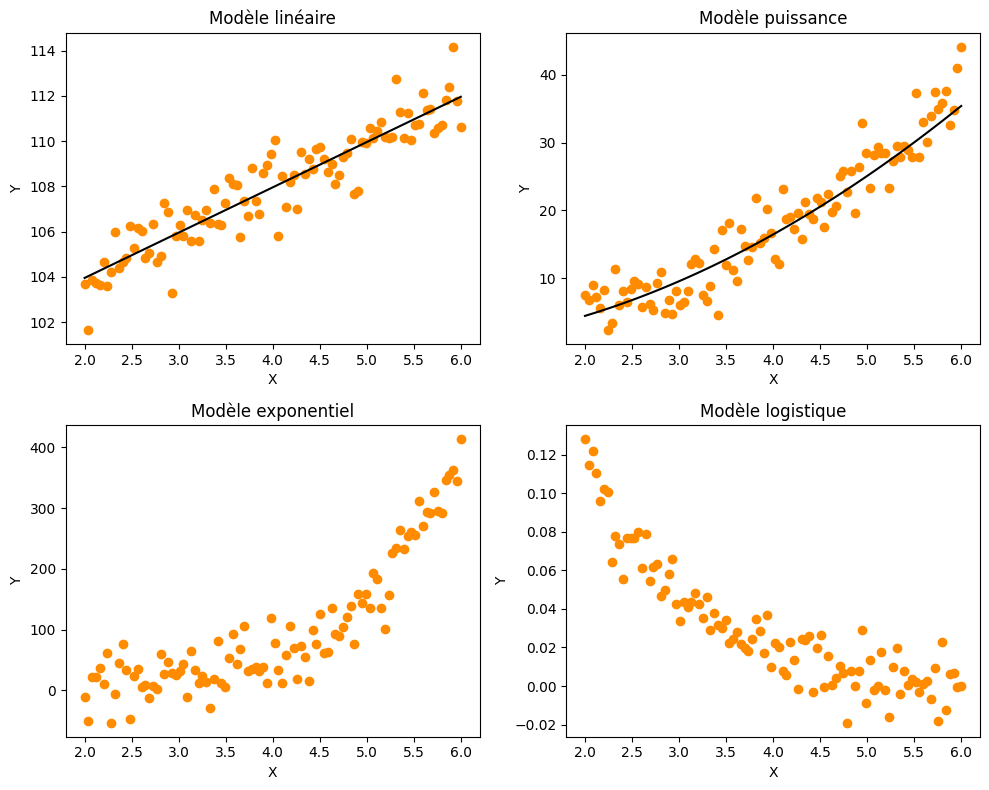

In [8]:
# Génération de valeurs X
X = np.linspace(2, 6, 100)  


# Ajout de bruit
bruit = np.random.normal(loc=0, scale=1, size=len(X)) 
# Modèle linéaire : Y = 2*X + 3
Y_lineaire = 2*X + 100 + bruit
Y_modele_lineaire = Modelisation(X,Y_lineaire,'lineaire')


# Ajout de bruit
bruit = np.random.normal(loc=0, scale=3, size=len(X)) 
# Modèle puissance : Y = X^2
Y_puissance = X**2 + bruit
Y_modele_puissance = Modelisation(X,Y_puissance,'puissance')


# Ajout de bruit
bruit = np.random.normal(loc=0, scale=30, size=len(X))
# Modèle exponentiel : Y = e^X
Y_exp = np.exp(X) + bruit
Y_modele_exp = Modelisation(X,Y_exp,'exponentiel')


# Ajout de bruit
bruit = np.random.normal(loc=0, scale=0.01, size=len(X)) 
# Modèle logistique : Y = e^(-X) / (1 + e^(-X))
Y_logistique = np.exp(-X) / (1 + np.exp(-X)) + bruit
Y_modele_logistique = Modelisation(X,Y_logistique,'logistique')


# Tracer chaque nuage de points
plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.scatter(X, Y_lineaire, color='darkorange', label='Linéaire avec bruit')
plt.plot(X, Y_modele_lineaire, color='black', label='Modèle')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Modèle linéaire')

plt.subplot(223)
plt.scatter(X, Y_exp, color='darkorange', label='Exponentiel avec bruit')
plt.plot(X, Y_modele_exp, color='black', label='Modèle')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Modèle exponentiel')

plt.subplot(222)
plt.scatter(X, Y_puissance, color='darkorange', label='Puissance avec bruit')
plt.plot(X, Y_modele_puissance, color='black', label='Modèle')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Modèle puissance')


plt.subplot(224)
plt.scatter(X, Y_logistique, color='darkorange', label='Logistique avec bruit')
plt.plot(X, Y_modele_logistique, color='black', label='Modèle')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Modèle logistique')

plt.tight_layout()
plt.show()


## 2 - Évaluation d'un modèle et prévision
### 2.a - Qualité d'un modèle par le coefficient de détermination

--------------------

Dans cette partie, nous abordons le calcul du **coefficient de détermination**. Cette métrique permet d'évaluer la performance d'un modèle et de prendre des décisions sur leur pertinence pour différentes possibles applications.

Il est important de noter que le coefficient de détermination $R^2\in $\[0,1\]. Également, plus cette valeur $R^2$ est proche de 1, plus le modèle est pertinent.

--------------------

>__Question 6 :__  Implémenter une méthode `Coefficient_determination` qui prend en entrée deux listes $X$, $Y$ et un paramètre `choix_modèle`, et qui renvoie le coefficient de détermination des variables linéarisées $X'$ et $Y'$ (obtenu pour la linéarisation du modèle choisi).

In [13]:
def Coefficient_determination(X, Y, choix_modele):
    if choix_modele == 'lineaire':
        X_lineaire = X
        Y_lineaire = Y
    elif choix_modele == 'puissance':
        X_lineaire = np.log(X)
        Y_lineaire = np.log(Y)
    elif choix_modele == 'exponentiel':
        X_lineaire = X
        Y_lineaire = np.log(Y)
    elif choix_modele == 'logistique':
        X_lineaire = X
        Y_lineaire = np.log(Y / (1 - Y))
    
    # Calcul de la moyenne de Y_lineaire
    Y_lineaire_moyenne = np.mean(Y_lineaire)
    
    # Calcul de la somme des carrés totale (Somme des carrés des résidus)
    somme_care_residus = np.sum((Y_lineaire - Y_lineaire_moyenne) ** 2)
    
    # Calcul de la somme des carrés expliqués (Somme des carrés de la régression)
    if choix_modele == 'lineaire':
        Y_optimal = np.polyval(np.polyfit(X_lineaire, Y_lineaire, 1), X_lineaire)
    elif choix_modele == 'puissance':
        a, b = np.polyfit(X_lineaire, Y_lineaire, 1)
        Y_optimal = np.exp(a * X_lineaire + b)
    elif choix_modele == 'exponentiel':
        a, b = np.polyfit(X_lineaire, Y_lineaire, 1)
        Y_optimal = np.exp(a * X_lineaire + b)
    elif choix_modele == 'logistique':
        a, b = np.polyfit(X_lineaire, Y_lineaire, 1)
        Y_optimal = np.exp(a * X_lineaire + b) / (1 + np.exp(a * X_lineaire + b))
    
    somme_care_regression = np.sum((Y_optimal - Y_lineaire_moyenne) ** 2)
    
    # Calcul du coefficient de détermination (R^2)
    R_carre = somme_care_regression / somme_care_residus
    
    return R_carre

--------------------

Dans la cellule suivante nous comparons le coefficient de détermination des différents modèles pour un même jeu de données, n'hésitez pas à changer l'expression de $Y$ pour observer dans chaque cas quel sera le meilleur modèle.

--------------------

In [14]:
# Génération de valeurs X
X = np.linspace(1, 10, 100)  

# Ajout de bruit
bruit = np.random.normal(loc=0, scale=1, size=len(X)) 

# Modèle linéaire : Y = 2*X + 3
Y = 2*X + 3 + bruit

modele='lineaire'
print('Le coefficient de détermination du modèle',modele,'est', Coefficient_determination(X,Y,modele))

modele='puissance'
print('Le coefficient de détermination du modèle',modele,'est', Coefficient_determination(X,Y,modele))

modele='exponentiel'
print('Le coefficient de détermination du modèle',modele,'est', Coefficient_determination(X,Y,modele))

modele='logistique'
print('Le coefficient de détermination du modèle',modele,'est', Coefficient_determination(X,Y,modele))

Le coefficient de détermination du modèle lineaire est 0.9704925300206033
Le coefficient de détermination du modèle puissance est 888.355548804919
Le coefficient de détermination du modèle exponentiel est 940.1612976968468
Le coefficient de détermination du modèle logistique est nan


C:\Users\omerf\AppData\Local\Temp\ipykernel_8236\3971247506.py:13: RuntimeWarning: invalid value encountered in log
  Y_lineaire = np.log(Y / (1 - Y))


### 2.b - (Bonus) Prévisions


--------------------

Dans cette dernière partie, nous utiliserons le coefficient de détermination pour sélectionner le meilleur modèle parmi ceux que nous avons étudiés. Ensuite, nous utilisons ce modèle optimal pour réaliser une prévision d'une nouvelle donnée $x$ ajoutée à $X$.

--------------------


>__Question 7 (Bonus) :__  Implémenter une méthode `Prevision` prenant en entrée deux variable (deux listes) `X` et `Y`, ainsi qu'une valeur `x` et qui renvoie une prédiction `y`. Cette valeur `y` est déterminée par le modèle (linéaire, puissance, exponentiel ou logistique) ayant le coefficient de détermination le plus haut pour le couple (X,Y).

In [15]:
def Prevision(X, Y, x):
    meilleurs_modeles = ['lineaire', 'puissance', 'exponentiel', 'logistique']
    meilleur_modele = ''
    meilleur_R_carre = -1
    
    # Trouver le modèle avec le meilleur coefficient de détermination
    for modele in meilleurs_modeles:
        R_carre = Coefficient_determination(X, Y, modele)
        if R_carre > meilleur_R_carre:
            meilleur_R_carre = R_carre
            meilleur_modele = modele
    
    # Utiliser le meilleur modèle pour la prédiction
    if meilleur_modele == 'lineaire':
        a, b = np.polyfit(X, Y, 1)
        y = a * x + b
    elif meilleur_modele == 'puissance':
        a, b = np.polyfit(np.log(X), np.log(Y), 1)
        y = np.exp(a * np.log(x) + b)
    elif meilleur_modele == 'exponentiel':
        a, b = np.polyfit(X, np.log(Y), 1)
        y = np.exp(a * x + b)
    elif meilleur_modele == 'logistique':
        a, b = np.polyfit(X, np.log(Y / (1 - Y)), 1)
        y = np.exp(a * x + b) / (1 + np.exp(a * x + b))
    
    return y

--------------------

Dans la cellule suivante vous pouvez tester la valeur prévue par votre modèle, et la comparer à la valeur que la fonction choisi aurait donné.

--------------------

C:\Users\omerf\AppData\Local\Temp\ipykernel_8236\3971247506.py:13: RuntimeWarning: invalid value encountered in log
  Y_lineaire = np.log(Y / (1 - Y))


La prévision de 5 pour la variable Y est 11.78


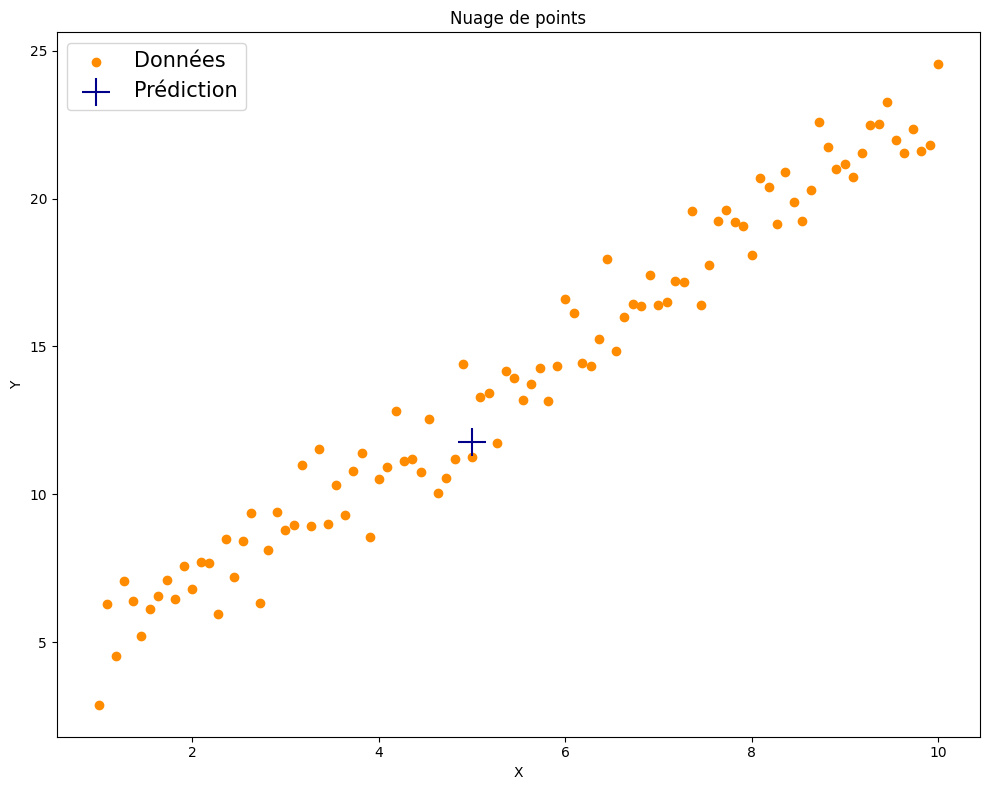

In [16]:
# Génération de valeurs X
X = np.linspace(1, 10, 100)  
x=5

# Ajout de bruit
bruit = np.random.normal(loc=0, scale=1, size=len(X)) 
# Modèle linéaire : Y = 2*X + 3
Y = 2*X+3 + bruit

#Valeur prédite par notre méthode
y=Prevision(X,Y, x)

print('La prévision de',x,'pour la variable Y est',round(y,2))



plt.figure(figsize=(10, 8))

plt.scatter(X, Y, color='darkorange', label='Données')
plt.scatter(x,y, s=400, color = 'darkblue', marker='+',label='Prédiction')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nuage de points')
plt.legend(fontsize=15)

plt.tight_layout()
plt.show()